In [1]:
import numpy as np
import matplotlib.pyplot as plt
from CADMium import Pssolver, Psgrid, Partition, Inverter

ModuleNotFoundError: No module named 'CADMium'

### Perform PDFT Calculation. 

Code should run as it is but for idential calculations increase to grid size to: [7,12,12]

In [ ]:
a = 4.522/2
#Nuclear charge for fragments A and B
Za, Zb = 4,4
#Set polarization 1-Unpolarized, 2-Polarized
pol = 1
#Fragment a electrons [alpha, beta]
Nmo_a = [[2]] #Number of molecular orbitals to calculate
N_a   = [[4]]
#Ensemble mix
nu_a = 1
#Fragment b electrons
Nmo_b = [[2]]
N_b   = [[4]]
#Ensemble mix
nu_b = 1

#Molecular elctron configuration
Nmo_m = [[4]]
N_m   = [[8]]


#Set up grid
NP = 7
NM = [4,4]
L = np.arccosh(15/a)
loc = np.array(range(-4,5)) #Stencil outline

grid = Psgrid(NP, NM, a, L, loc)
grid.initialize()

part = Partition(grid, Za, Zb, pol, Nmo_a, N_a, nu_a, Nmo_b, N_b, nu_b, { "kinetic_part_type" : "inversion",
                                                                          "ab_sym"            : True,
                                                                          "ens_spin_sym"      : False})
#Setup inverter object
mol_solver = Pssolver(grid, Nmo_m, N_m, {"tol_orbital" : 1e-9})
part.inverter = Inverter(grid, mol_solver, {"invert_type"    : "wuyang", 
                                            "ab_sym"         : True,
                                            "ens_spin_sym"   : False,
                                            "tol_lin_solver" : 1e-3,
                                            "tol_invert"     : 1e-4,
                                            "res_factor"     : 0,
                                           })

part.optPartition.isolated = True
part.scf({"disp"  : False,
          "alpha" : [0.6],
          "e_tol" : 1e-7})

D0_frag_a = part.KSa.n.copy()
D0_frag_b = part.KSa.n.copy()

part.optPartition.isolated   = False
part.scf({"disp"       : True,
          "alpha"      : [0.3],
          "max_iter"   : 200,
          "e_tol"      : 1e-7,
          "continuing" : True, 
          "iterative"  : False})

# #Store full densities under the presence of vp.
Dvp_frag_a = part.KSa.n.copy()
Dvp_frag_b = part.KSb.n.copy()

---
### Generate Figure 9. Parititon Potential. 

NameError: name 'x' is not defined

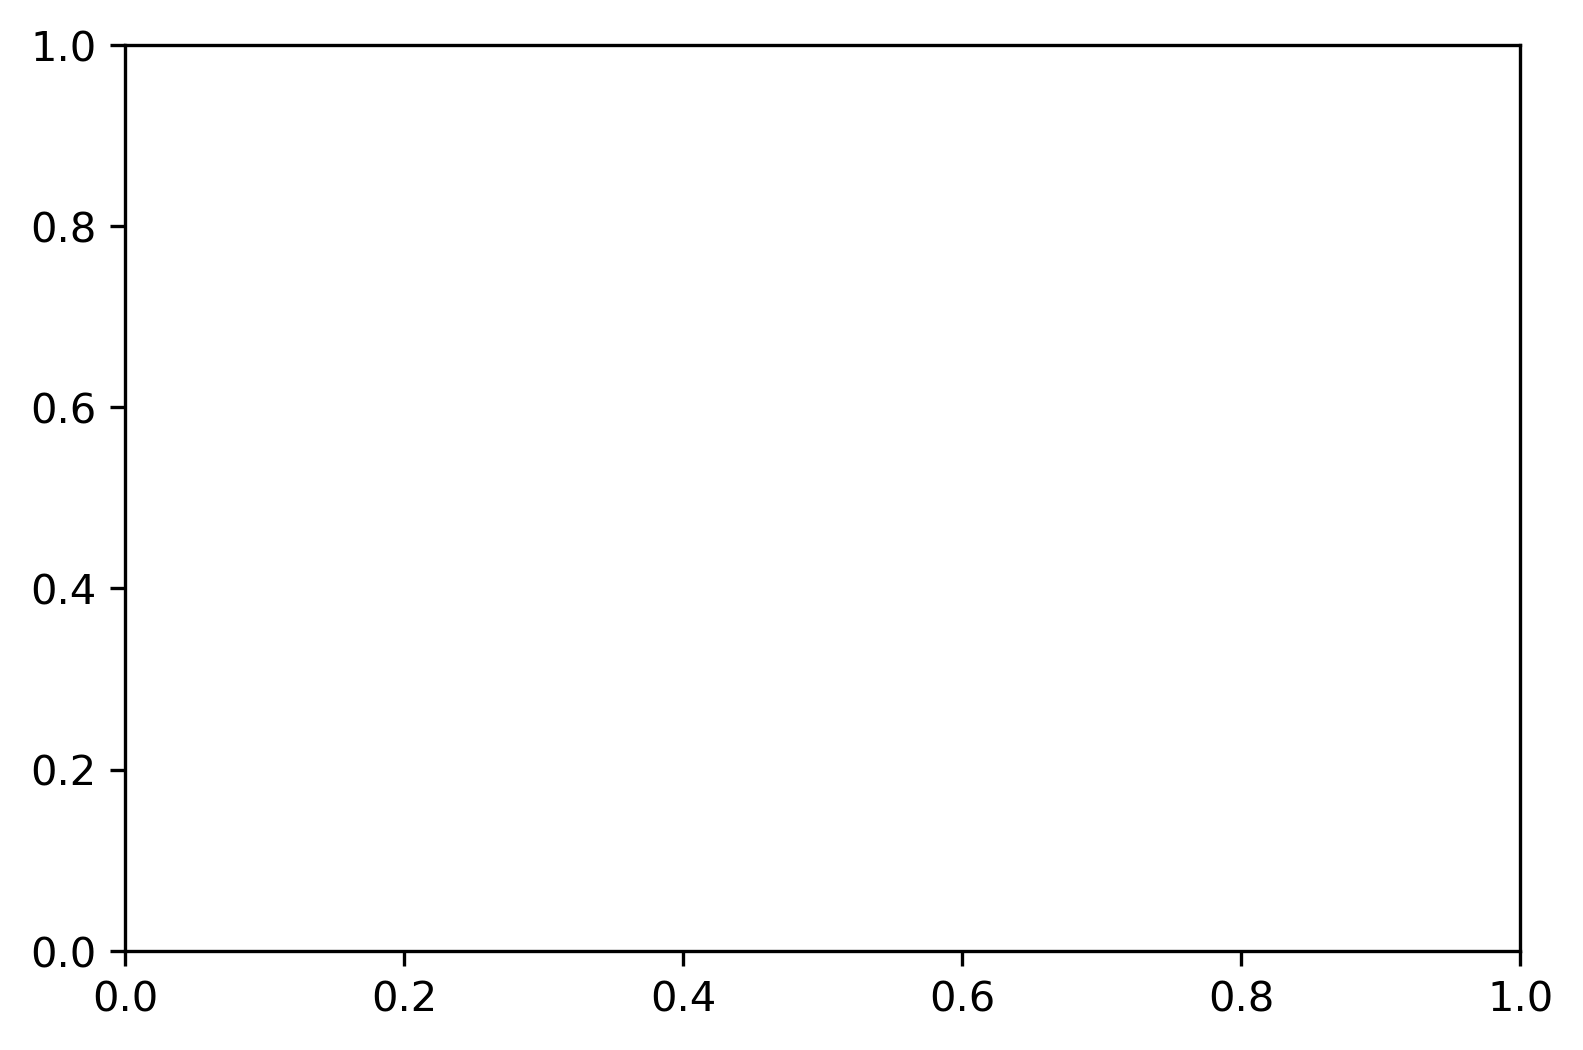

In [5]:
## full, x,y = grid.plotter(part.V.vp[:,0])
fig, ax = plt.subplots(dpi=300)

#vmin=-0.3, vmax=0.3

plot = ax.contourf(x,y,full, levels=20, cmap="viridis")
ax.scatter(4.522/2, 0, color='white', s=20)
ax.scatter(-4.522/2, 0, color='white', s=15)

ax.axis('off')



ax.set_aspect('equal')
ax.set_xlim([-5,5])
ax.set_ylim([-5,5])

# fig.colorbar(plot) 

---
### Generate Figure 9. Difference between Fragment Density and Isolated Atomic Density. 

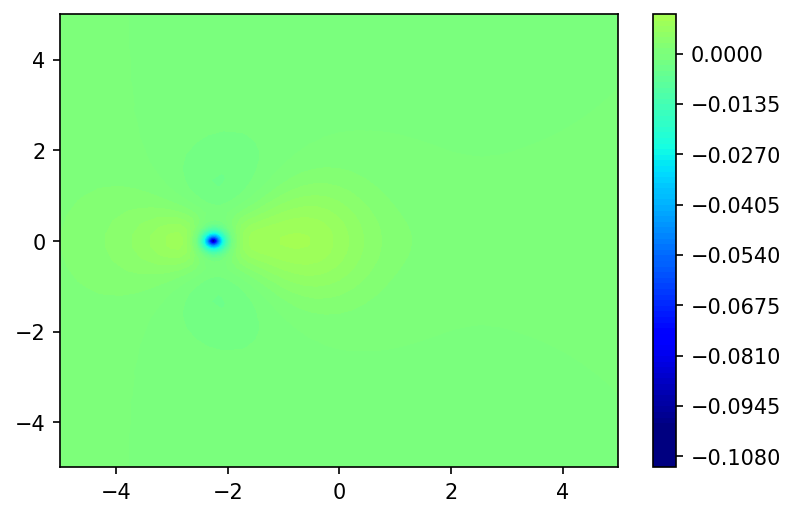

In [6]:

D_grid, x, y = grid.plotter(D0_frag_a[:,0])
D_vp_grid, _, _ = grid.plotter(Dvp_frag_a[:,0])

fig, ax = plt.subplots(dpi=150)

plot = ax.contourf(x,y, D_vp_grid - D_grid, levels=100, cmap="jet", vmin=-0.1, vmax=0.1)

ax.set_xlim([-5,5])
ax.set_ylim([-5,5])

fig.colorbar(plot)
# plt.show()

---
### Generate Figure 11. Components of the Partition Potential

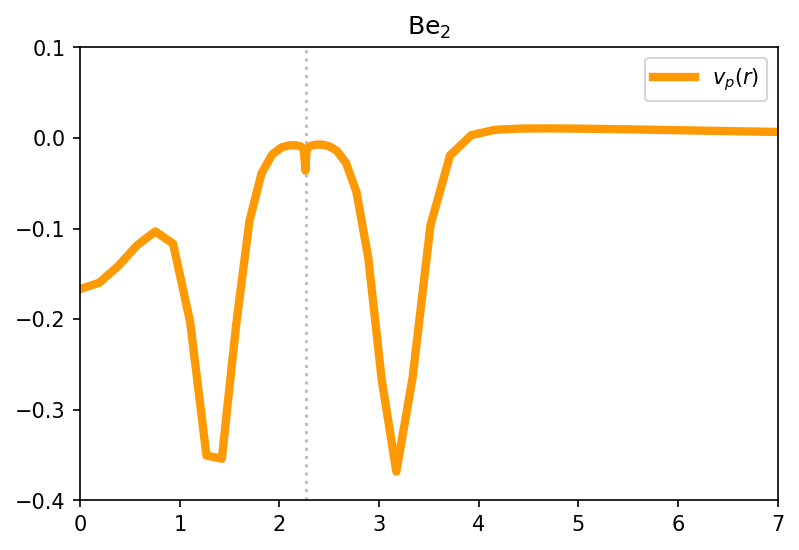

In [10]:
x_axis, vp      = grid.axis_plot(part.V.vp[:,0])
x_axis, vp_kin  = grid.axis_plot(part.V.vp_kin[:,0])
x_axis, vp_xc   = grid.axis_plot(part.V.vp_x[:,0] + part.V.vp_c[:,0] )
x_axis, vp_hext = grid.axis_plot( part.V.vp_h[:,0] + part.V.vp_pot[:,0])

fig, ax = plt.subplots(dpi=150)

ax.set_title("Be$_2$")
ax.axvline(x=a, color="gray", ls=':', alpha=0.5)

ax.plot(x_axis, vp, label='$v_p(r)$', lw=4, color="#FD9903")
# ax.plot(x_axis, vp_kin, label='Kinetic')
# ax.plot(x_axis, vp_xc, label='XC')
# ax.plot(x_axis, vp_hext, label="H + Vext")

ax.set_xlim(0,7)
ax.set_ylim(-0.4, 0.1)

ax.legend()

---
### Generate Table 9. Energies and Components of Ep, in atomic Units

In [ ]:
values = {}
for i in part.E.__dict__:
    if i.startswith("__") is False:
        values.update({i : getattr(part.E, i)})
values

In [ ]:
%matplotlib widget

fig, ax = plt.subplots(subplot_kw={"projection": "3d"}, dpi=300)
surf = ax.plot_surface(x, y, full, cmap="viridis", alpha=0.9,
                       linewidth=10, antialiased=True)

ax.grid(False)
ax.set_axis_off()

ax.dist = 6
ax.set_facecolor("white")
fig.show()